In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split
from main import train_random_forest

df = pd.read_csv("Crop_recommendation.csv")

X = df.drop("label", axis=1)
y = df["label"]


In [27]:
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted', zero_division=0)
    recall = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    class_report = classification_report(y_test, preds, zero_division=0)
    conf_matrix = confusion_matrix(y_test, preds)

    model_filename = "random_forest_cr.joblib"
    joblib.dump(model, model_filename)

    return {
        "model": model,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "classification_report": class_report,
        "confusion_matrix": conf_matrix,
        "model_filename": model_filename
    }


accuracy: 0.31666666666666665
precision: 0.31860602487601414
recall: 0.31666666666666665
f1_score: 0.31680690808363215
classification_report:               precision    recall  f1-score   support

       maize       0.30      0.35      0.32       208
        rice       0.35      0.32      0.33       246
       wheat       0.29      0.29      0.29       206

    accuracy                           0.32       660
   macro avg       0.32      0.32      0.32       660
weighted avg       0.32      0.32      0.32       660

model_filename: random_forest_cr.joblib
Confusion Matrix:
 [[72 72 64]
 [88 78 80]
 [77 70 59]]


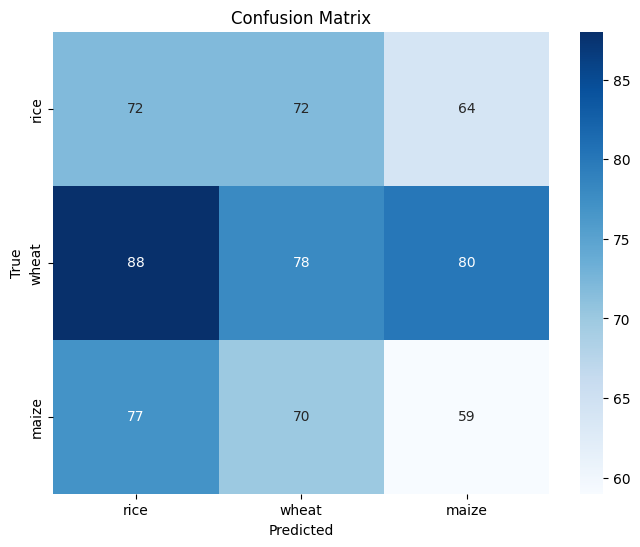

In [28]:
df = pd.read_csv("Crop_recommendation.csv")
X = df.drop("label", axis=1)
y = df["label"].copy()
labels = ["rice", "wheat", "maize"]
y = np.random.choice(labels, size=len(df))  # for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = train_random_forest(X_train, X_test, y_train, y_test)

for key, value in results.items():
    if key not in ["model", "confusion_matrix"]:
        print(f"{key}: {value}")
print("Confusion Matrix:\n", results["confusion_matrix"])

cm = results["confusion_matrix"]


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from main import train_random_forest

df = pd.read_csv("Fertilizer Prediction.csv")

X = df.drop("Fertilizer", axis=1)
y = df["Fertilizer"]


In [30]:

def train_decision_tree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted', zero_division=0)
    recall = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    class_report = classification_report(y_test, preds, zero_division=0)
    conf_matrix = confusion_matrix(y_test, preds)

    model_filename = "decision_tree_cr.joblib"
    joblib.dump(model, model_filename)

    return {
        "model": model,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "classification_report": class_report,
        "confusion_matrix": conf_matrix,
        "model_filename": model_filename
    }


accuracy: 0.3125
precision: 0.3335084033613445
recall: 0.3125
f1_score: 0.3201879764379765
classification_report:               precision    recall  f1-score   support

         DAP       0.41      0.32      0.36        22
         SSP       0.38      0.38      0.38        26
        Urea       0.14      0.19      0.16        16

    accuracy                           0.31        64
   macro avg       0.31      0.30      0.30        64
weighted avg       0.33      0.31      0.32        64

model_filename: decision_tree_cr.joblib
Confusion Matrix:
 [[ 7  7  8]
 [ 6 10 10]
 [ 4  9  3]]


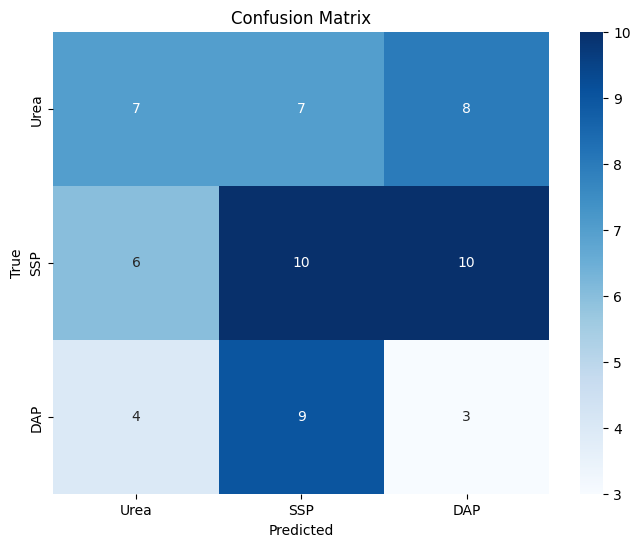

In [ ]:
df = pd.read_csv("Fertilizer Prediction.csv")

cat_cols = ['Soil_Type', 'Crop_Type']
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop(columns=['Fertilizer'])
y = df['Fertilizer']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

labels = ["Urea", "SSP", "DAP"]
y = np.random.choice(labels, size=len(df))  # for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = train_decision_tree(X_train, X_test, y_train, y_test)

for key, value in results.items():
    if key not in ["model", "confusion_matrix"]:
        print(f"{key}: {value}")
print("Confusion Matrix:\n", results["confusion_matrix"])



cm = results["confusion_matrix"]


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()